# Experiment 2.1 #
Aggregated model with/wo helsingfors

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
RANDOM_SEED = 142
from pycaret.regression import *




In [51]:
# load dataset
pd_data = pd.read_csv("experiment1_data.csv").drop(columns="Unnamed: 0")

#TODO drop Helsingfors



# Split into test and train data for aggregated model #

In [52]:
pd_data.head(-10)

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
1,2022-04-07 21:00:00,oslo,4.092830,1.0,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49479,2023-04-02 19:00:00,stavanger,6.060454,2.8,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,12.856381
49480,2023-04-02 19:00:00,tromsø,2.095099,-2.3,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,6.052910
49481,2023-04-02 19:00:00,trondheim,4.093120,1.4,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,2.084384
49482,2023-04-02 20:00:00,bergen,3.328194,2.5,-1.000000,-6.165360e-12,-0.222521,-0.974928,0.999949,-0.010096,4.067940


In [53]:
# Extract unseen data to compare with final model
def split_test_train(dataset):
    # Calculate the index at which to split
    split_index = int(len(dataset) * 0.8)

    # Split into training and testing sets
    train_df = dataset.iloc[:split_index]
    test_df = dataset.iloc[split_index:]

    return train_df, test_df


train, test = split_test_train(pd_data)

# oslo_train, oslo_test = split_test_train(oslo)
# bergen_train, bergen_test = split_test_train(bergen)
# trondheim_train, trondheim_test = split_test_train(trondheim)
# tromsø_train, tromsø_test = split_test_train(tromsø)
# stavanger_train, stavanger_test = split_test_train(stavanger)

train.head()

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
1,2022-04-07 21:00:00,oslo,4.092830,1.0,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN


# Experiment 1: Quality of aggregated predictions vs. location based #

With helsingfors training data 

In [71]:
train["location"].unique()

array(['bergen', 'oslo', 'stavanger', 'tromsø', 'trondheim',
       'helsingfors'], dtype=object)

In [55]:
s = setup(data=train, test_data=test, target='consumption',
              fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, session_id=123)


,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(49494, 11)"
4,Transformed data shape,"(49494, 16)"
5,Transformed train set shape,"(39595, 16)"
6,Transformed test set shape,"(9899, 16)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.0%


In [56]:
best_aggregated = compare_models(sort="MAE")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:13:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.8103,3.3966,1.5340,0.3688,0.3201,0.2378,0.0600
et,Extra Trees Regressor,1.0090,3.6541,1.4779,0.5213,0.2665,0.2517,0.8750
lightgbm,Light Gradient Boosting Machine,1.0462,4.2298,1.5709,0.4691,0.2939,0.2723,0.8820
huber,Huber Regressor,1.0953,4.5555,1.7057,0.3033,0.3062,0.3167,0.0760
par,Passive Aggressive Regressor,1.1144,4.2100,1.6334,0.3896,0.3108,0.3224,0.0370
ada,AdaBoost Regressor,1.1145,5.0466,1.6871,0.4024,0.2972,0.2769,0.3670
gbr,Gradient Boosting Regressor,1.1224,4.3459,1.5952,0.4635,0.3020,0.2864,0.7050
rf,Random Forest Regressor,1.1427,5.1994,1.6955,0.3917,0.3144,0.2810,1.8470
ridge,Ridge Regression,1.2060,4.4031,1.7138,0.3961,0.3269,0.3392,0.0350
br,Bayesian Ridge,1.2355,4.4590,1.7389,0.3697,0.3391,0.3602,0.0320


In [57]:
#best_aggregated = tune_model(best_aggregated, optimize = 'MAE')


In [58]:
finalize_model(best_aggregated)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temperature', 'day_sin',
                                             'day_cos', 'week_sin', 'week_cos',
                                             'year_sin', 'year_cos',
                                             'consumption_last_week'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['time', 'location'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['location'],
                                    transformer=OneHotEncoder(cols=['location'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['time'],
                                    transformer=TargetEncoder(cols=['time'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator', KNeighborsRegressor(n_jobs=-1))])

In [59]:
evaluate_model(best_aggregated)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Without Helsingfors-training data ##

In [60]:
train_wo_Helsingfors = train[train['location'] != 'helsingfors']

In [61]:
t = setup(data=train_wo_Helsingfors, test_data=test, target='consumption',
              fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, session_id=123)

,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(44855, 11)"
4,Transformed data shape,"(44855, 15)"
5,Transformed train set shape,"(34956, 15)"
6,Transformed test set shape,"(9899, 15)"
7,Numeric features,8
8,Categorical features,2
9,Rows with missing values,0.0%


In [62]:
best_aggregated_wo_helsingfors = compare_models(sort = "MAE")


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:15:02
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.6342,2.8351,1.1520,0.6057,0.2220,0.2030,0.1620
et,Extra Trees Regressor,1.0269,3.9301,1.4238,0.5233,0.2559,0.2676,1.0790
lightgbm,Light Gradient Boosting Machine,1.0402,4.0752,1.4542,0.4990,0.2714,0.2795,1.8550
gbr,Gradient Boosting Regressor,1.0545,4.1807,1.4671,0.4970,0.2722,0.2789,0.7530
ridge,Ridge Regression,1.1040,4.6850,1.5301,0.4681,0.2772,0.2912,0.0520
br,Bayesian Ridge,1.1239,4.7209,1.5512,0.4413,0.2863,0.3061,0.0460
lr,Linear Regression,1.1251,4.7265,1.5520,0.4407,0.2866,0.3065,0.0730
par,Passive Aggressive Regressor,1.1258,4.2728,1.4734,0.4462,0.2972,0.3502,0.0440
rf,Random Forest Regressor,1.1348,5.0139,1.5913,0.4206,0.2949,0.2954,2.4200
dt,Decision Tree Regressor,1.1361,4.9455,1.5825,0.4255,0.2954,0.2985,0.1220


In [63]:
#best_aggregated = tune_model(best_aggregated, optimize = 'MAE')


In [64]:
best_aggregated_wo_helsingfors = finalize_model(best_aggregated_wo_helsingfors)

## Predict with all models and print MAE ##

In [65]:
test.head()

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
39595,2023-01-24 04:00:00,helsingfors,6.426000,0.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,2.856730
39596,2023-01-24 04:00:00,oslo,12.346534,-5.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,6.421000
39597,2023-01-24 04:00:00,stavanger,5.510114,5.7,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,12.346132
39598,2023-01-24 04:00:00,tromsø,1.581411,1.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,5.540014
39599,2023-01-24 04:00:00,trondheim,2.797215,4.3,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,1.531032


In [66]:
test.head()

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
39595,2023-01-24 04:00:00,helsingfors,6.426000,0.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,2.856730
39596,2023-01-24 04:00:00,oslo,12.346534,-5.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,6.421000
39597,2023-01-24 04:00:00,stavanger,5.510114,5.7,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,12.346132
39598,2023-01-24 04:00:00,tromsø,1.581411,1.0,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,5.540014
39599,2023-01-24 04:00:00,trondheim,2.797215,4.3,0.707107,0.707107,-0.993712,-0.111964,0.389742,0.920924,1.531032


In [72]:
#Print all MAE in a table 

from sklearn.metrics import mean_absolute_error

MAE_df = pd.DataFrame(columns = ["Model", "MAE"])



# predictions_best_aggregated = predict_model(best_aggregated, data = test)["prediction_label"]
predictions_best_aggregated_wo_helsingfors =  predict_model(best_aggregated_wo_helsingfors, data = test)["prediction_label"]


actual = test["consumption"]

# MAE_best_aggregated = round(mean_absolute_error(actual,predictions_best_aggregated), 3)
MAE_best_aggregated_wo_helsingfors = round(mean_absolute_error(actual,predictions_best_aggregated_wo_helsingfors), 3)

# MAE_df.loc[0]= ["Aggregated Model",  MAE_best_aggregated]
MAE_df.loc[1]= ["Aggregated Model w/o Helsingfors training data",  MAE_best_aggregated_wo_helsingfors]


MAE_df

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.1386,0.0640,0.2530,0.9944,0.0298,0.0250


,Model,MAE
1,Aggregated Model w/o Helsingfors training data,0.139


# Experiment 2.2 #
Aggregated Model w/o Helsingfors training data vs location based

In [73]:
# Prepare location based testing data
# Make split on each location


def select_location(dataset, location):
    dataset = pd_data[pd_data["location"] == location].reset_index().drop(columns= ["index"])
    return dataset

oslo = select_location(pd_data, "oslo")
bergen = select_location(pd_data, "bergen")
trondheim = select_location(pd_data, "trondheim")
tromsø = select_location(pd_data, "tromsø")
stavanger = select_location(pd_data, "stavanger")


# Extract unseen data to compare with final model
def split_test_train(dataset):
    # Calculate the index at which to split
    split_index = int(len(dataset) * 0.8)

    # Split into training and testing sets
    train_df = dataset.iloc[:split_index]
    test_df = dataset.iloc[split_index:]

    return train_df, test_df


oslo_train, oslo_test = split_test_train(oslo)
bergen_train, bergen_test = split_test_train(bergen)
trondheim_train, trondheim_test = split_test_train(trondheim)
tromsø_train, tromsø_test = split_test_train(tromsø)
stavanger_train, stavanger_test = split_test_train(stavanger)


location_test_dict = {"oslo": oslo_test, "trondheim": trondheim_test, "tromsø": tromsø_test, "stavanger": stavanger_test, "bergen": bergen_test}


In [ ]:
location_test_dict["oslo"]

,Unnamed: 0,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,39122,2023-01-20 21:00:00,oslo,14.766486,-12.5,-8.660254e-01,5.000000e-01,0.997204,-0.074730,0.336997,0.941506,11.690550
6913,39128,2023-01-20 22:00:00,oslo,14.572231,-13.1,-7.071068e-01,7.071068e-01,0.993712,-0.111964,0.337672,0.941264,11.272142
6914,39134,2023-01-20 23:00:00,oslo,14.215177,-13.0,-5.000000e-01,8.660254e-01,0.988831,-0.149042,0.338347,0.941022,10.805634
6915,39140,2023-01-21 00:00:00,oslo,13.942359,-13.2,-2.588190e-01,9.659258e-01,0.982566,-0.185912,0.339021,0.940779,10.416723
6916,39146,2023-01-21 01:00:00,oslo,13.801610,-13.1,-1.263327e-11,1.000000e+00,0.974928,-0.222521,0.339695,0.940536,10.103340
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,49466,2023-04-02 17:00:00,oslo,12.410225,5.5,-7.071068e-01,-7.071068e-01,-0.111964,-0.993712,0.999968,-0.007945,12.410225
8637,49472,2023-04-02 18:00:00,oslo,12.856381,4.8,-8.660254e-01,-5.000000e-01,-0.149042,-0.988831,0.999962,-0.008662,12.856381
8638,49478,2023-04-02 19:00:00,oslo,13.010338,0.6,-9.659258e-01,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,13.010338
8639,49484,2023-04-02 20:00:00,oslo,12.738356,-0.3,-1.000000e+00,-6.165360e-12,-0.222521,-0.974928,0.999949,-0.010096,12.738356


In [74]:
MAE_locationmodels.head()

NameError: name 'MAE_locationmodels' is not defined

In [76]:
MAE_locationmodels = pd.read_csv("Tables for chap. 4/MAE_best_locationmodels.csv").drop(columns="last_week_consumption")
MAE_locationmodels.rename(columns={"min_MAE": "MAE location-based model"}, inplace=True)


MAE_agg = pd.DataFrame(columns = ["location", "MAE aggregated model"])



i = 0
for location in location_test_dict:
    test = location_test_dict[location]
    test_X = test.drop(columns="consumption")
    test_y = test["consumption"]
    predictions_best_aggregated = predict_model(best_aggregated_wo_helsingfors, data = test_X)["prediction_label"]

    MAE_best_aggregated = round(mean_absolute_error(test_y, predictions_best_aggregated), 3)

    MAE_agg.loc[i]= [location,  MAE_best_aggregated]
    i+=1

MAE_comparison = pd.merge(MAE_locationmodels, MAE_agg, on = "location", how = "left").drop(columns="Unnamed: 0")
MAE_comparison


,location,MAE location-based model,MAE aggregated model
0,oslo,0.430,0.401
1,trondheim,0.065,0.116
2,tromsø,0.031,0.041
3,stavanger,0.048,0.121
4,bergen,0.126,0.105


In [90]:
MAE_comparison.to_csv("MAE_location_VS_agg.csv")

In [103]:
evaluate_model(best_aggregated_wo_helsingfors)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [104]:
plot_model(best_aggregated_wo_helsingfors, plot = 'feature_all')


TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [113]:
test_y

6912    4.216040
6913    4.139416
6914    4.030091
6915    3.882645
6916    3.760710
          ...   
8636    3.183564
8637    3.401135
8638    3.390738
8639    3.328194
8640    3.126721
Name: consumption, Length: 1729, dtype: float64

In [114]:
test_X.head()

,time,location,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,2023-01-20 21:00:00,bergen,-8.1,-8.660254e-01,0.500000,0.997204,-0.074730,0.336997,0.941506,4.249238
6913,2023-01-20 22:00:00,bergen,-8.2,-7.071068e-01,0.707107,0.993712,-0.111964,0.337672,0.941264,4.107906
6914,2023-01-20 23:00:00,bergen,-8.1,-5.000000e-01,0.866025,0.988831,-0.149042,0.338347,0.941022,4.006104
6915,2023-01-21 00:00:00,bergen,-5.9,-2.588190e-01,0.965926,0.982566,-0.185912,0.339021,0.940779,3.897353
6916,2023-01-21 01:00:00,bergen,-5.1,-1.263327e-11,1.000000,0.974928,-0.222521,0.339695,0.940536,3.762435


In [109]:
from explainerdashboard import RegressionExplainer
# dashboard(best_aggregated, display_format="inline") # https://www.youtube.com/watch?v=FZ5-GtdYez0

model = best_aggregated_wo_helsingfors

explainer = RegressionExplainer(model, X=test_X, y=test_y)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...


In [112]:
from explainerdashboard import ExplainerDashboard

ExplainerDashboard(explainer).run()


Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1729 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.22.48.81:8050


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [99]:
df = pd.read_csv("final_comparison.csv", sep = ";")

In [100]:
df.head()

,location,MAE best model,MAE baseline,improvement
0,oslo,0.401,5.782,93%
1,trondheim,0.116,1.682,93%
2,tromsø,0.041,3.712,99%
3,stavanger,0.121,6.558,98%
4,bergen,0.105,0.444,76%


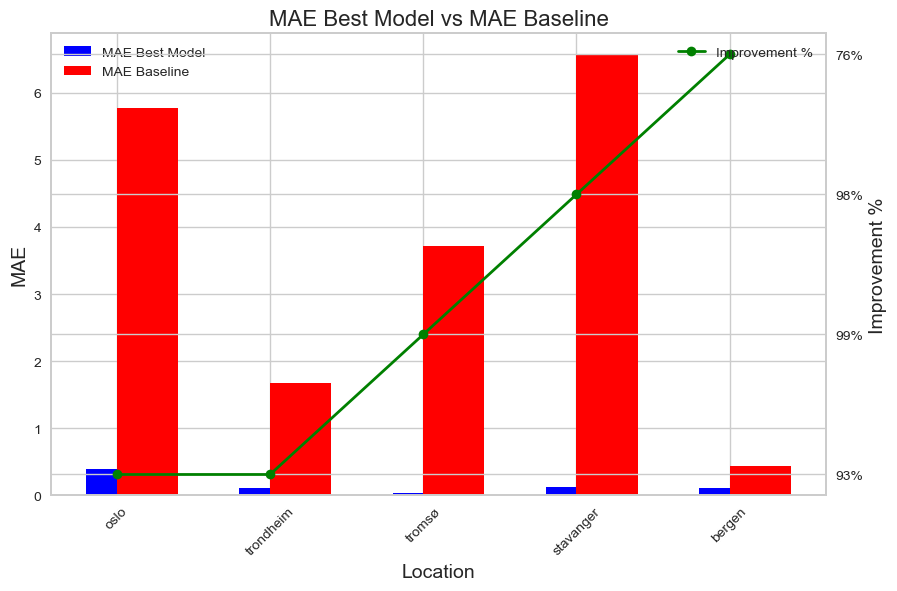

In [101]:
# Set up the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE best model
ax1.bar(df['location'], df['MAE best model'], width=0.4, label='MAE Best Model', color='blue', align='center')

# Plot MAE baseline
ax1.bar(df['location'], df['MAE baseline'], width=0.4, label='MAE Baseline', color='red', align='edge')

# Labels and titles
ax1.set_xlabel('Location', fontsize=14)
ax1.set_ylabel('MAE', fontsize=14)
ax1.set_title('MAE Best Model vs MAE Baseline', fontsize=16)
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a secondary y-axis for the improvement percentage
ax2 = ax1.twinx()

# Plot the improvement percentage
ax2.plot(df['location'], df['improvement'], label='Improvement %', color='green', marker='o', linestyle='-', linewidth=2)

# Set the y-axis label for the secondary axis
ax2.set_ylabel('Improvement %', fontsize=14)
ax2.legend(loc='upper right')

# Show the combined plot
plt.show()


# GRAVEYARD #

In [102]:
# An interesting view is looking at the Actual Values and Predicted Values (Label) in a histogram over the entire dataset. This shows the distribution between the values. We can see how the Predicted Values seem to peak in a more distributed manner and skew to the left. 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.distplot(predict_unseen["consumption"],
                kde=False,
                color="#c6690c")
sns.distplot(predict_unseen["prediction_label"],
                kde=False,
                color="#664697")
plt.title("Distribution between Actual Value and Predicted Value")
plt.ylabel("Count")
plt.xlabel("Consumption")
#plt.xlim((74,101))
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

NameError: name 'predict_unseen' is not defined

<Figure size 1500x500 with 0 Axes>

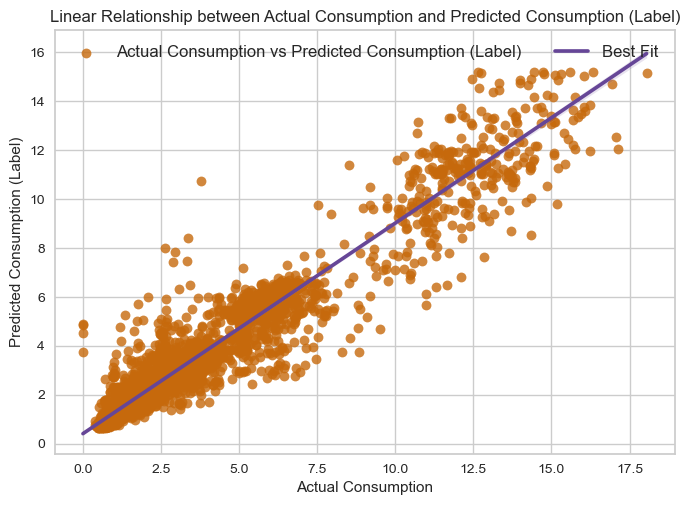

In [ ]:
# We can plot the Predicted Value (Label) vs Actual Value 
sns.regplot(x="consumption", y="prediction_label", data=predict_unseen, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
plt.title("Linear Relationship between Actual Consumption and Predicted Consumption (Label)")
plt.ylabel("Predicted Consumption (Label)")
plt.xlabel("Actual Consumption")
plt.legend(('Actual Consumption vs Predicted Consumption (Label)', 'Best Fit'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
#Sources
# https://nbviewer.org/github/pycaret/examples/blob/main/Pycaret_2.1_Regression_EmployeePerformance.ipynb